# Reducing the core circuit depth using dynamic circuits.

In [ ]:
from sampler_solver_WORKS import sampler_solver
from merge_methods_CHAIN import solve_master_equation
from efficient_qiskit_solver_markovian_CHAIN import markovian_qiskit_solver
import numpy as np
import matplotlib.pyplot as plt
from qiskit_aer import AerSimulator
import colorsys
plt.rcParams['text.usetex'] = True
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 600

omega_c = 1.1
n = 3
kappa = [0.2]
omega_m = [1.1]*n
g = [0.01]*(2*(n-1))
gamma = [0.8*(10**-6)]*n
initial_state = [0]*(2**n)
initial_state[-1] = 1

t = np.linspace(0, 750, 250)
r = 5

backend = AerSimulator()
optimization_level = 0
options = {'default_shots' : 10**4}

evs, counts, states, coeff = sampler_solver(n, omega_m, omega_c, gamma, g, kappa, t, r, initial_state, backend, optimization_level, options)

evs_estimator = markovian_qiskit_solver(n, omega_m, omega_c, gamma, g, kappa, t, r, initial_state, backend, optimization_level, options)

evs_markov = solve_master_equation(n, omega_m, omega_c, gamma, kappa, g, t, initial_state, 'markovian')

def generate_complementary_colors(n, palette_type='default'):

    colors = []

    hues = np.linspace(0, 1, n, endpoint=False)

    
    if palette_type == 'pastel':

        saturation = 0.4  
        value = 0.9       

    elif palette_type == 'neon':

        saturation = 1.0  
        value = 1.0       

    else:
        saturation = 0.8  
        value = 0.9       

    for h in hues:

        r, g, b = colorsys.hsv_to_rgb(h, saturation, value)

        colors.append((r, g, b))
    
    return colors

colors = generate_complementary_colors(len(evs.keys()), palette_type = 'default')

for key in evs:

    plt.plot(t, evs_markov[key], color = colors[int(key)])
    plt.plot(t, evs[key], color = colors[int(key)], linestyle = 'dashed')
    plt.plot(t, evs_estimator[key], color = colors[int(key)], linestyle = 'dotted')
    plt.plot(np.NaN, np.NaN, linestyle = 'None', marker = '.', color =  colors[int(key)], label = '$q_{%i}$' %int(key))

plt.plot(np.NaN, np.NaN, linestyle = 'dashed', color = 'black', label = 'Sampler')
plt.plot(np.NaN, np.NaN, linestyle = 'solid', color = 'black', label = 'QuTiP')
plt.plot(np.NaN, np.NaN, linestyle = 'dotted', color = 'black', label = 'Estimator')
plt.xlabel('t')
plt.ylabel('population')
#plt.yscale('log')
plt.title(f'n = {key} implementation comparison')
plt.legend()
#plt.savefig('markovian circuit for %s' %key)
plt.show()  

test assigning one ancilla per emitter pair.

from c_if_sampler_TEST_one_ancilla import get_circuit_sampler
from qiskit_aer import AerSimulator
import numpy as np
from qiskit.circuit.library import StatePreparation
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300

omega_c = 1.1
n = 3
kappa = [0.2]
omega_m = [1.1]*n
g = [0.01]*(2*(n-1))
gamma = [0.8*(10**-6)]*n
initial_state = [0]*(2**n)
initial_state[-1] = 1

t = np.linspace(0, 750, 250)

backend = AerSimulator()
optimization_level = 0
options = {'default_shots' : 10**4}

r = 1

qc = get_circuit_sampler(n, omega_m, omega_c, g, gamma, kappa, initial_state, r, 'one ancilla')
a = qc.draw('mpl', fold = -1)
#a.savefig('sampler_test_circuit_3')
a

just making sure that it yields accurate results


from sampler_solver_TEST_one_ancilla import sampler_solver
from merge_methods_CHAIN import solve_master_equation
from efficient_qiskit_solver_markovian_CHAIN import markovian_qiskit_solver
import numpy as np
import matplotlib.pyplot as plt
from qiskit_aer import AerSimulator
import colorsys
from generate_complementary_colors import generate_complementary_colors
plt.rcParams['text.usetex'] = True
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 600

omega_c = 1.1
n = 3
kappa = [0.2]
omega_m = [1.1]*n
g = [0.01]*(2*(n-1))
gamma = [0.8*(10**-6)]*n
initial_state = [0]*(2**n)
initial_state[-1] = 1

t = np.linspace(0, 750, 250)
r = 5

backend = AerSimulator()
optimization_level = 0
options = {'default_shots' : 10**3}

evs_regular = sampler_solver(n, omega_m, omega_c, gamma, g, kappa, t, r, initial_state, backend, optimization_level, options, 'regular')

evs_ancilla = sampler_solver(n, omega_m, omega_c, gamma, g, kappa, t, r, initial_state, backend, optimization_level, options, 'one ancilla')

evs_markov = solve_master_equation(n, omega_m, omega_c, gamma, kappa, g, t, initial_state, 'markovian')

colors = generate_complementary_colors(len(evs_markov.keys()), palette_type = 'default', start_color = 'hotpink')

for key in evs_markov:

    plt.plot(t, evs_markov[key], color = colors[int(key)], linestyle = 'solid')
    plt.plot(t, evs_regular[key], color = colors[int(key)], linestyle = 'dashed')
    plt.plot(t, evs_ancilla[key], color = colors[int(key)], linestyle = 'dotted')
    plt.plot(np.NaN, np.NaN, linestyle = 'None', marker = '.', color =  colors[int(key)], label = '$q_{%i}$' %int(key))

plt.plot(np.NaN, np.NaN, linestyle = 'dashed', color = 'black', label = 'Regular circuit')
plt.plot(np.NaN, np.NaN, linestyle = 'solid', color = 'black', label = 'QuTiP')
plt.plot(np.NaN, np.NaN, linestyle = 'dotted', color = 'black', label = 'Pairwise ancilla')
plt.xlabel('t')
plt.ylabel('population')
#plt.yscale('log')
plt.title('population of $\\left.|1 \\right>_{q_i}$')
plt.legend()
#plt.savefig('markovian circuit for %s' %key)
plt.show()  

these two cells below are for circuit properties comparison

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from get_circuit_properties import get_circuit_properties, count_swap
from c_if_sampler_WORKS_one_ancilla import get_circuit_sampler
from c_if_sampler_TEST_layering import get_circuit_sampler_layered
from efficient_circuit_markovian_CHAIN import create_markovian_circuit

service = QiskitRuntimeService(
    channel='ibm_quantum',
    instance='ibm-q-ikerbasque/upv-ehu/dynamics-of-mole',
    token='8b44f1c0867c1a11e554cae2f6201ed52dcd07edff18e845fed56d899f3992a9f773c47aab0332d767425d6f57f3ee862f5d3b330ae3cc971e5f9e741206fe7b'
)

real_backend = service.backend('ibm_fez')

omega_c = 1.1

two_qubit_depths = {'c_if' : [], 'c_if_ancilla' : [], 'c_if_layered' : [], 'c_if_ancilla_layered' : [], 'estimator' : [], 'c_if_ancilla_layered_layout' : [] }
swaps = {'c_if' : [], 'c_if_ancilla' : [], 'c_if_layered' : [], 'c_if_ancilla_layered' : [], 'estimator' : [], 'c_if_ancilla_layered_layout' : [] }
#two_qubit_depths = {'c_if_qc_ancilla_layered' : [], 'estimator' : [], 'c_if_ancilla_layout' : []}
#swaps = {'c_if_qc_ancilla_layered' : [], 'estimator' : [], 'c_if_ancilla_layout' : []}
nt_tqd = {'c_if' : [], 'c_if_ancilla' : [], 'c_if_layered' : [], 'c_if_ancilla_layered' : [], 'estimator' : [], 'c_if_ancilla_layered_layout' : [] }
nt_swaps = {'c_if' : [], 'c_if_ancilla' : [], 'c_if_layered' : [], 'c_if_ancilla_layered' : [], 'estimator' : [], 'c_if_ancilla_layered_layout' : [] }

n_emitters = [2,3,4,5,6,7,8,9,10]#, 15, 20, 25, 30, 40, 50]

for n in n_emitters:
    
    kappa = [0.2]
    omega_m = [1.1]*n
    g = [0.01]*(2*(n-1))
    gamma = [0.8*(10**-6)]*n
    initial_state = [0]*(2**n)
    initial_state[0] = 1

    r = 1

    c_if_qc = get_circuit_sampler(n, omega_m, omega_c, g, gamma, kappa, initial_state, r, 'regular')
    c_if_qc_ancilla = get_circuit_sampler(n, omega_m, omega_c, g, gamma, kappa, initial_state, r, 'one ancilla')
    c_if_qc_layered, init_layout = get_circuit_sampler_layered(n, omega_m, omega_c, g, gamma, kappa, initial_state, r, 'regular')
    c_if_qc_ancilla_layered, init_layout = get_circuit_sampler_layered(n, omega_m, omega_c, g, gamma, kappa, initial_state, r, 'one ancilla')
    #c_if_qc_ancilla_layered_ccx = get_circuit_sampler_layered_ccx(n, omega_m, omega_c, g, gamma, kappa, initial_state, r, 'one ancilla')
    estimator_qc = create_markovian_circuit(n, omega_m, omega_c, g, gamma, kappa, initial_state, r)


    pm = generate_preset_pass_manager(optimization_level = 3, backend = real_backend)
    pm_layout = generate_preset_pass_manager(optimization_level = 3, backend = real_backend, initial_layout = custom_init_layout(n))

    qcs = [c_if_qc, c_if_qc_ancilla, c_if_qc_layered, c_if_qc_ancilla_layered , estimator_qc]

    #qcs = [c_if_qc_ancilla_layered, estimator_qc]

    trans_qcs = pm.run(qcs)
    trans_qcs.append(pm_layout.run(c_if_qc_ancilla_layered))

    properties = [get_circuit_properties(x) for x in trans_qcs] 

    qcs.append(c_if_qc_ancilla_layered)
    
    decomp_qcs = [x.decompose().decompose() for x in qcs]

    non_trans_properties = [get_circuit_properties(x) for x in decomp_qcs]

    counter = 0

    for key in two_qubit_depths:

        two_qubit_depths[key].append([properties[counter]['two qubit depth']])
        swaps[key].append([properties[counter]['swaps']])
        nt_tqd[key].append([non_trans_properties[counter]['two qubit depth']])
        nt_swaps[key].append([non_trans_properties[counter]['swaps']])
        counter = counter + 1

    print(f'n = {n} done!')

n = 2 done!
n = 3 done!
n = 4 done!
n = 5 done!
n = 6 done!
n = 7 done!
n = 8 done!
n = 9 done!
n = 10 done!


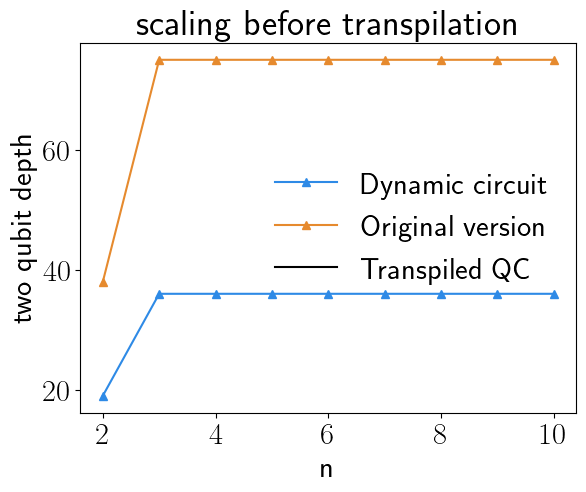

In [ ]:
from generate_complementary_colors import generate_complementary_colors
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 600
plt.rcParams.update({'font.size': 22})
import numpy as np

colors = generate_complementary_colors(len(two_qubit_depths.keys()), palette_type = 'default', start_color = 'hotpink')

linestyles = {'c_if' : 'solid', 'estimator' : 'solid'}
markers = {'c_if' : '^', 'estimator' : '^'}
colors = {'c_if' : colors[4], 'estimator' : colors[1]}
labels = {'c_if' : 'Dynamic circuit', 'estimator' : 'Original version' }

#linestyles = {'c_if' : 'solid', 'estimator' : 'solid'}
#markers = {'c_if' : '.', 'estimator' : '^'}
#colors = {'c_if' : colors[0], 'estimator' : colors[1]}
#labels = {'c_if' : 'IfElse', 'estimator' : 'Original version' }


for key in linestyles:

    #plt.plot(n_emitters, two_qubit_depths[key], color = colors[key], marker = markers[key], linestyle = linestyles[key], label = labels[key])
    #plt.plot(n_emitters, np.array(nt_tqd[key]), color = colors[key], marker = markers[key], linestyle = 'dashed', alpha = 0.5)
    plt.plot(n_emitters, np.array(nt_tqd[key]), color = colors[key], marker = markers[key], linestyle = linestyles[key], label = labels[key])

    #for i, txt in enumerate(two_qubit_depths[key]):

        #plt.annotate(txt, (n_emitters[i], two_qubit_depths[key][i][0]), textcoords="offset points", xytext=(0,10), ha='center')
    
plt.plot(np.NaN, np.NaN, linestyle = 'solid', color = 'black', label = 'Transpiled QC')
#plt.plot(np.NaN, np.NaN, linestyle = 'dashed', color = 'black', alpha = 0.5, label = 'Virtual QC')
plt.xlabel('n')
plt.ylabel('two qubit depth')
#plt.yscale('log')
plt.title('scaling before transpilation')
plt.legend(loc='center right', frameon=False)
plt.savefig('original and dynamic comparison', bbox_inches='tight')
plt.show()  